# Import Required Library Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_excel('/content/marketing_campaign1.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

In [ ]:
df.size

64960

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Explorartory Data Analysis

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].median())
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
df[['Education','Marital_Status']]=df[['Education','Marital_Status']].apply(LabelEncoder().fit_transform)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,4,5,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,2,2,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,3,5,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
present_year = 2024
df['Age'] = present_year-df['Year_Birth']
df['Age']

0       67
1       70
2       59
3       40
4       43
        ..
2235    57
2236    78
2237    43
2238    68
2239    70
Name: Age, Length: 2240, dtype: int64

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [ ]:
columns_to_drop = ['ID', 'Year_Birth','Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Response']
df = df.drop(columns=columns_to_drop)
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age
0,2,4,58138.0,0,0,58,635,88,546,172,...,10,4,7,0,0,0,0,0,0,67
1,2,4,46344.0,1,1,38,11,1,6,2,...,1,2,5,0,0,0,0,0,0,70
2,2,5,71613.0,0,0,26,426,49,127,111,...,2,10,4,0,0,0,0,0,0,59
3,2,5,26646.0,1,0,26,11,4,20,10,...,0,4,6,0,0,0,0,0,0,40
4,4,3,58293.0,1,0,94,173,43,118,46,...,3,6,5,0,0,0,0,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,1,46,709,43,182,42,...,3,4,5,0,0,0,0,0,0,57
2236,4,5,64014.0,2,1,56,406,0,30,0,...,2,5,7,0,0,0,1,0,0,78
2237,2,2,56981.0,0,0,91,908,48,217,32,...,3,13,6,0,1,0,0,0,0,43
2238,3,5,69245.0,0,1,8,428,30,214,80,...,5,10,3,0,0,0,0,0,0,68


In [ ]:
df.shape

(2240, 24)

In [ ]:
df[['Age', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds',
     'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

,Age,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,67,58138.0,635,88,546,172,88,88,3,8,10,4,7
1,70,46344.0,11,1,6,2,1,6,2,1,1,2,5
2,59,71613.0,426,49,127,111,21,42,1,8,2,10,4
3,40,26646.0,11,4,20,10,3,5,2,2,0,4,6
4,43,58293.0,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,61223.0,709,43,182,42,118,247,2,9,3,4,5
2236,78,64014.0,406,0,30,0,0,8,7,8,2,5,7
2237,43,56981.0,908,48,217,32,12,24,1,2,3,13,6
2238,68,69245.0,428,30,214,80,30,61,2,6,5,10,3


In [ ]:
# Define the columns to remove outliers
columns_to_check = ['Age', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth']

In [ ]:
# Function to remove outliers using z-score
def remove_outliers(df, columns):
    threshold = 3
    z_scores = stats.zscore(df[columns])
    # Filter rows where any z-score exceeds the threshold
    return df[(z_scores < threshold).all(axis=1)]

# Remove outliers using z-score
df_no_outliers = remove_outliers(df, columns_to_check)

# Compare the size of the original dataset with datasets after removing outliers
print("Original dataset size:", df.shape)
print("Dataset size after removing outliers (z_score)):", df_no_outliers.shape)

Original dataset size: (2240, 24)
Dataset size after removing outliers (z_score)): (1978, 24)


In [ ]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1978 non-null   int64  
 1   Marital_Status       1978 non-null   int64  
 2   Income               1978 non-null   float64
 3   Kidhome              1978 non-null   int64  
 4   Teenhome             1978 non-null   int64  
 5   Recency              1978 non-null   int64  
 6   MntWines             1978 non-null   int64  
 7   MntFruits            1978 non-null   int64  
 8   MntMeatProducts      1978 non-null   int64  
 9   MntFishProducts      1978 non-null   int64  
 10  MntSweetProducts     1978 non-null   int64  
 11  MntGoldProds         1978 non-null   int64  
 12  NumDealsPurchases    1978 non-null   int64  
 13  NumWebPurchases      1978 non-null   int64  
 14  NumCatalogPurchases  1978 non-null   int64  
 15  NumStorePurchases    1978 non-null   i

# Visualization

In [ ]:
# Boxplots before and after removing outliers

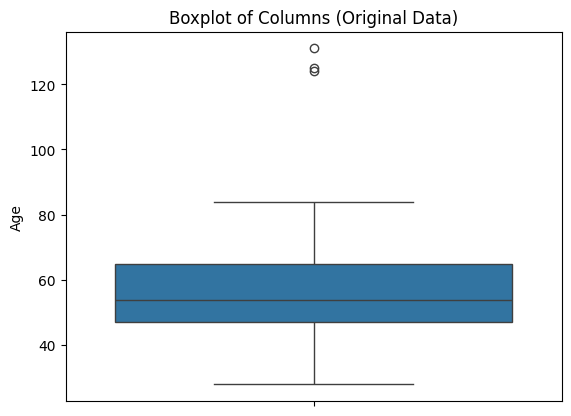

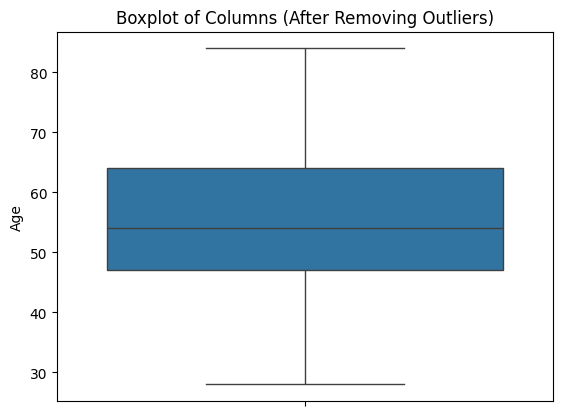

In [ ]:
sns.boxplot(data=df['Age'])
plt.title('Boxplot of Columns (Original Data)')
plt.show()

sns.boxplot(data=df_no_outliers['Age'])
plt.title('Boxplot of Columns (After Removing Outliers)')
plt.show()

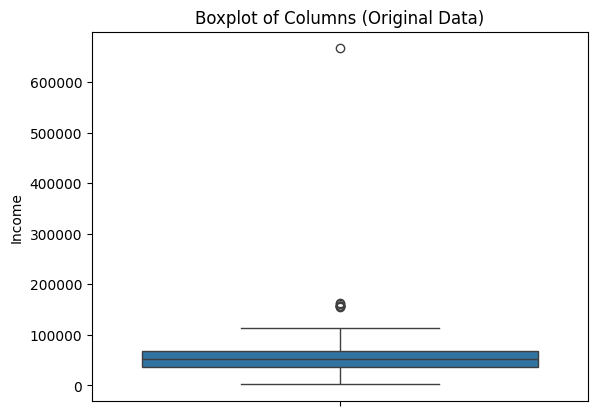

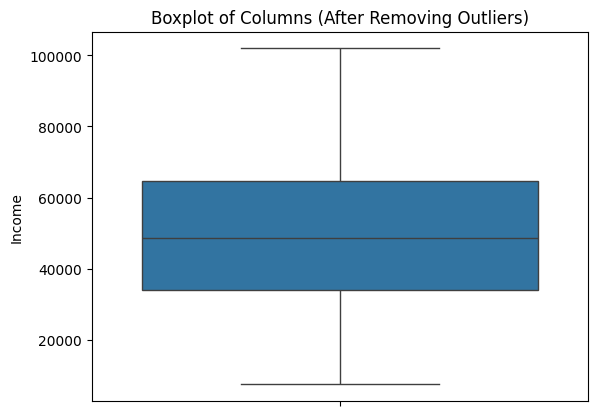

In [ ]:
sns.boxplot(data=df['Income'])
plt.title('Boxplot of Columns (Original Data)')
plt.show()

sns.boxplot(data=df_no_outliers['Income'])
plt.title('Boxplot of Columns (After Removing Outliers)')
plt.show()

In [ ]:
# Histograms before and after removing outliers

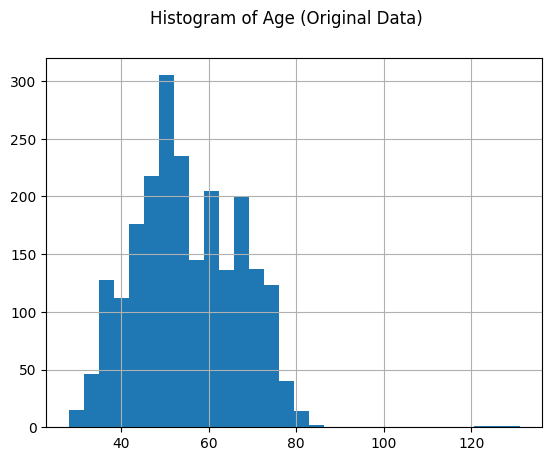

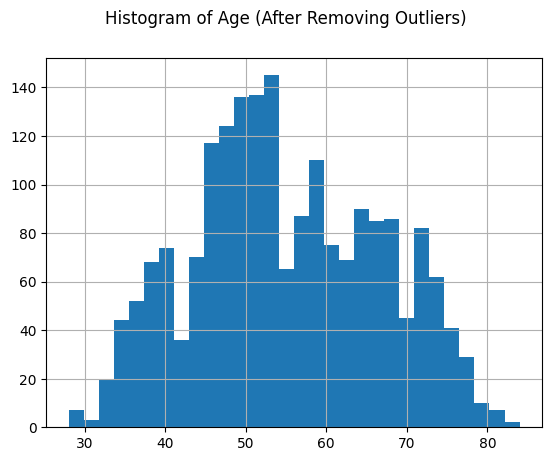

In [ ]:
df['Age'].hist(bins=30)
plt.suptitle('Histogram of Age (Original Data)')
plt.show()

df_no_outliers['Age'].hist(bins=30)
plt.suptitle('Histogram of Age (After Removing Outliers)')
plt.show()

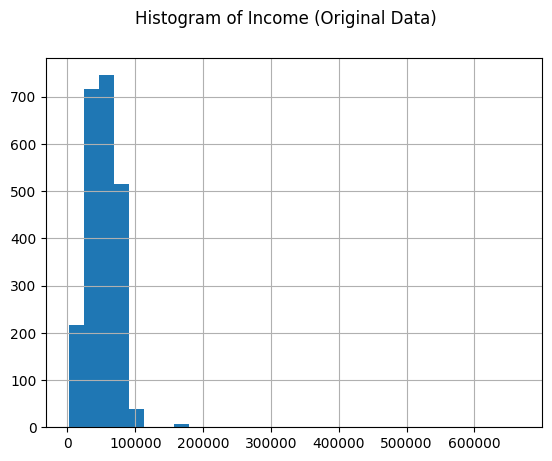

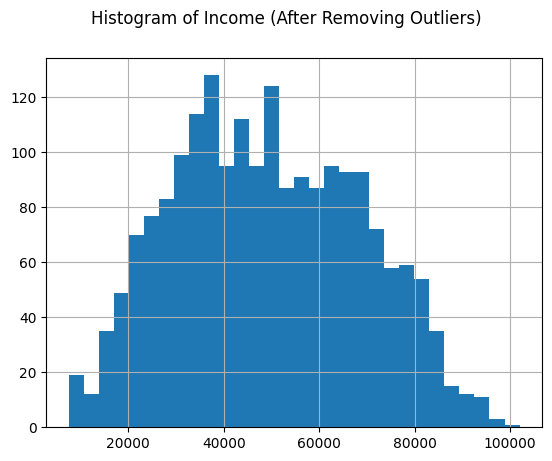

In [ ]:
df['Income'].hist(bins=30)
plt.suptitle('Histogram of Income (Original Data)')
plt.show()

df_no_outliers['Income'].hist(bins=30)
plt.suptitle('Histogram of Income (After Removing Outliers)')
plt.show()

In [ ]:
df_no_outliers

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age
0,2,4,58138.0,0,0,58,635,88,546,172,...,10,4,7,0,0,0,0,0,0,67
1,2,4,46344.0,1,1,38,11,1,6,2,...,1,2,5,0,0,0,0,0,0,70
2,2,5,71613.0,0,0,26,426,49,127,111,...,2,10,4,0,0,0,0,0,0,59
3,2,5,26646.0,1,0,26,11,4,20,10,...,0,4,6,0,0,0,0,0,0,40
4,4,3,58293.0,1,0,94,173,43,118,46,...,3,6,5,0,0,0,0,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,2,3,34421.0,1,0,81,3,3,7,6,...,0,2,7,0,0,0,0,0,0,50
2236,4,5,64014.0,2,1,56,406,0,30,0,...,2,5,7,0,0,0,1,0,0,78
2237,2,2,56981.0,0,0,91,908,48,217,32,...,3,13,6,0,1,0,0,0,0,43
2238,3,5,69245.0,0,1,8,428,30,214,80,...,5,10,3,0,0,0,0,0,0,68


In [ ]:
df_no_outliers.shape

(1978, 24)

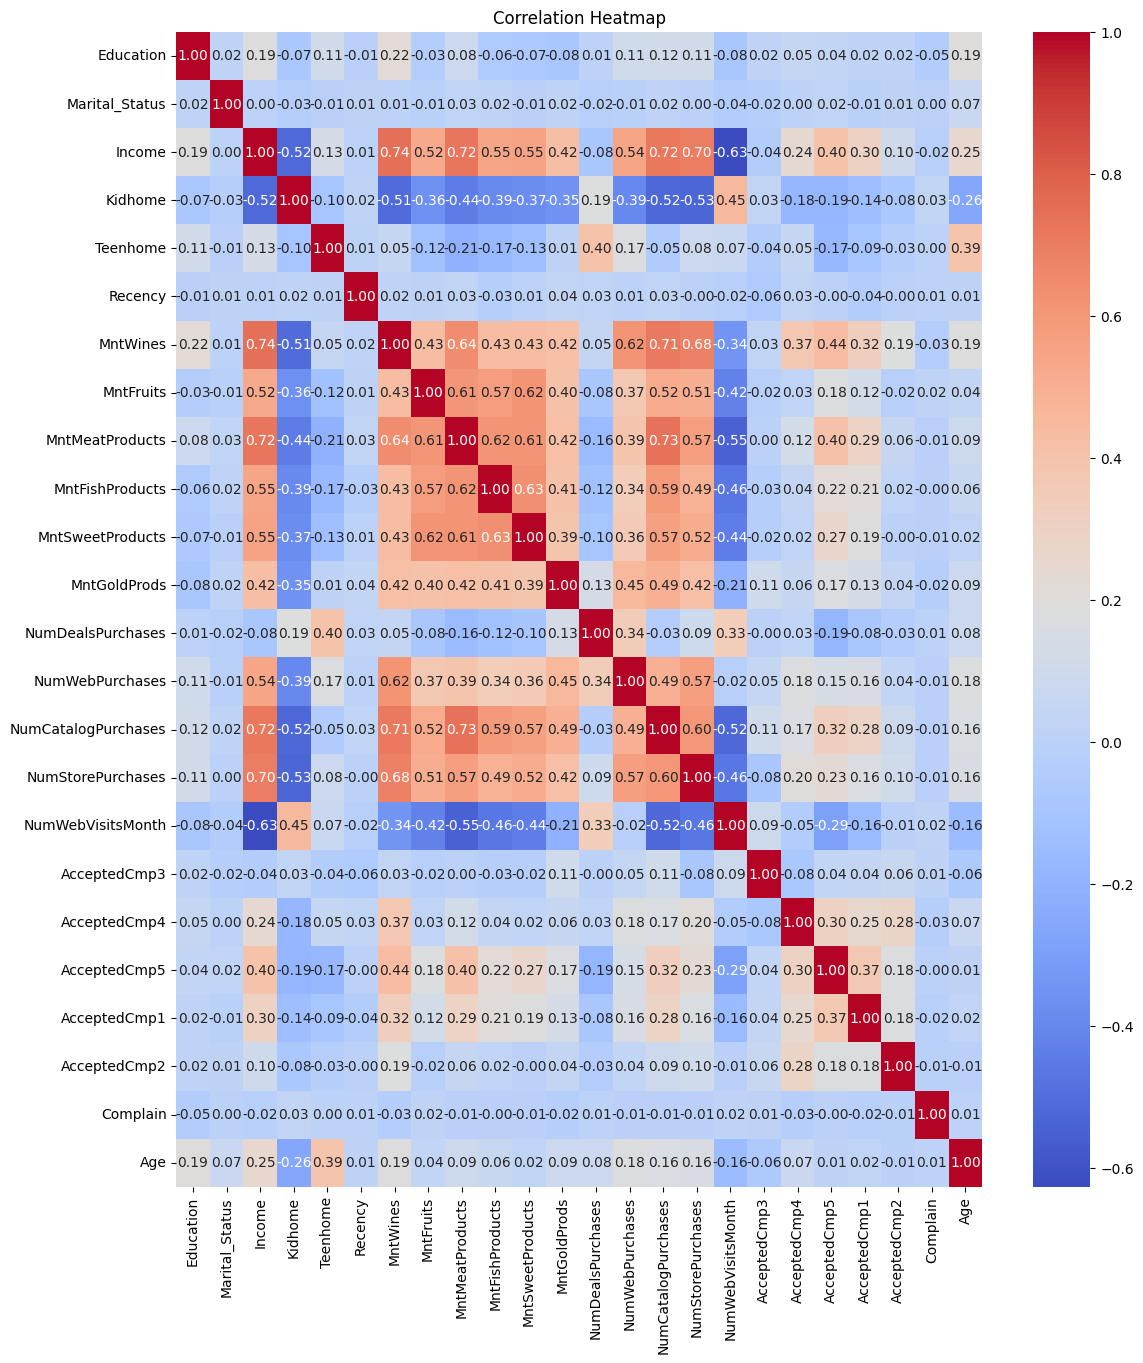

In [ ]:
# Correlation heatmap
corr = df_no_outliers.corr()
plt.figure(figsize=(13,15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df_no_outliers.shape

(1978, 24)

In [ ]:
df_no_outliers.size

47472

In [ ]:
df_no_outliers['Education'].unique()

array([2, 4, 3, 1, 0])

In [ ]:
df_no_outliers.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,...,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000
mean,2.417594,3.726491,49263.832912,0.482305,0.528817,49.300303,272.295753,19.774014,132.138018,28.659252,...,2.300303,5.580384,5.495450,0.069767,0.071284,0.055612,0.046006,0.011628,0.010111,55.044995
std,1.127454,1.073673,19503.393831,0.545307,0.543903,28.988212,319.535688,29.661315,180.895109,41.978523,...,2.578423,3.175981,2.197214,0.254819,0.257364,0.229228,0.209551,0.107231,0.100070,11.609281
min,0.000000,0.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
25%,2.000000,3.000000,34125.750000,0.000000,0.000000,24.000000,20.000000,1.000000,14.000000,2.000000,...,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000
50%,2.000000,4.000000,48606.000000,0.000000,1.000000,50.000000,135.000000,7.000000,51.000000,10.000000,...,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000
75%,3.000000,5.000000,64719.750000,1.000000,1.000000,74.000000,445.000000,25.000000,169.000000,36.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000
max,4.000000,7.000000,101970.000000,2.000000,2.000000,99.000000,1311.000000,143.000000,843.000000,201.000000,...,11.000000,13.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000


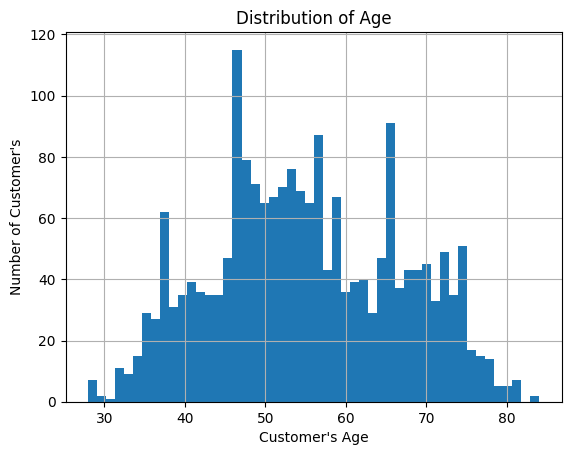

In [ ]:
df_no_outliers['Age'].hist(bins=50)
plt.title('Distribution of Age')
plt.xlabel("Customer's Age")
plt.ylabel("Number of Customer's")
plt.show()

In [ ]:
df_no_outliers['Education'].value_counts()

2    971
4    444
3    337
0    173
1     53
Name: Education, dtype: int64

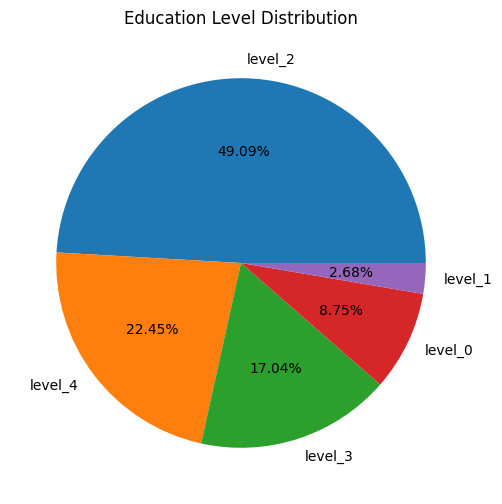

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(df_no_outliers['Education'].value_counts(), labels =['level_2','level_4','level_3','level_0','level_1'], autopct='%.02f%%');
plt.title('Education Level Distribution')
plt.show()

In [ ]:
df_no_outliers['Marital_Status'].unique()

array([4, 5, 3, 2, 6, 1, 0, 7])

In [ ]:
df_no_outliers['Marital_Status'].value_counts()

3    766
5    520
4    416
2    207
6     63
1      3
7      2
0      1
Name: Marital_Status, dtype: int64

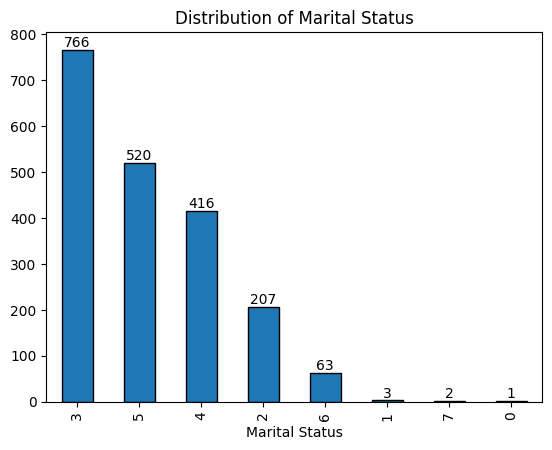

In [ ]:
# Plotting the Education Levels
ax=df_no_outliers['Marital_Status'].value_counts().plot(kind="bar",title='Distribution of Marital Status', edgecolor="black")
for i in ax.containers:
  ax.bar_label(i)
  ax.set_xlabel('Marital Status')
  plt.show()

<ipython-input-44-9575130fd859>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_outliers['Income'])


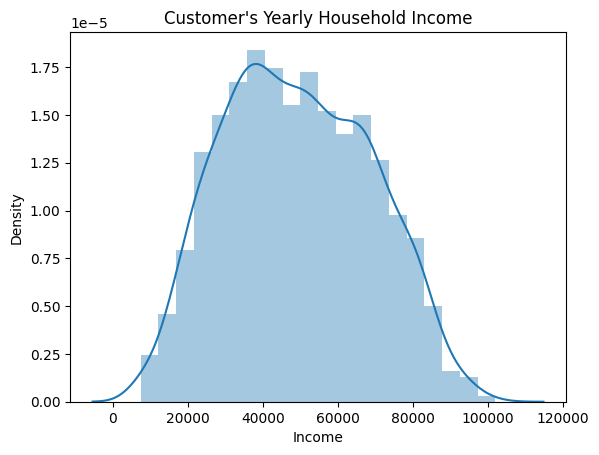

In [ ]:
sns.distplot(df_no_outliers['Income'])
plt.title("Customer's Yearly Household Income");

In [ ]:
max_income_count = df_no_outliers['Income'].value_counts().max()
print('Maximum Income Count',max_income_count)
min_income_count = df_no_outliers['Income'].value_counts().min()
print('Minimum Income Count',min_income_count)
mean_income_count = df_no_outliers['Income'].value_counts().mean()
print('Mean Income Count',mean_income_count)


Maximum Income Count 21
Minimum Income Count 1
Mean Income Count 1.1374353076480737


In [ ]:
df_no_outliers['Kidhome'].value_counts()

0    1071
1     860
2      47
Name: Kidhome, dtype: int64

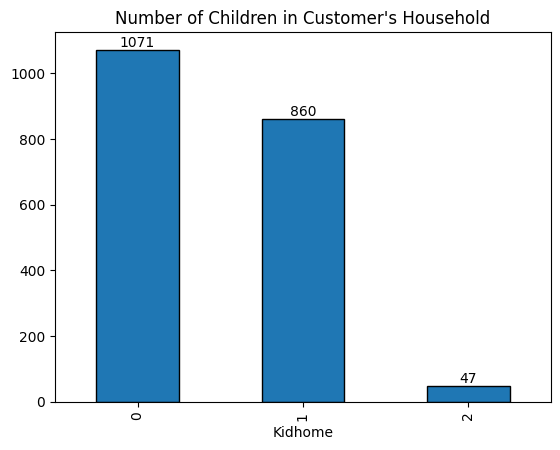

In [ ]:
# Plotting the Number of Children in Customer's Household
ax=df_no_outliers['Kidhome'].value_counts().plot(kind="bar",title="Number of Children in Customer's Household", edgecolor="black")
for i in ax.containers:
  ax.bar_label(i)
  ax.set_xlabel('Kidhome')
  plt.show()

In [ ]:
df_no_outliers['Teenhome'].value_counts()

0    978
1    954
2     46
Name: Teenhome, dtype: int64

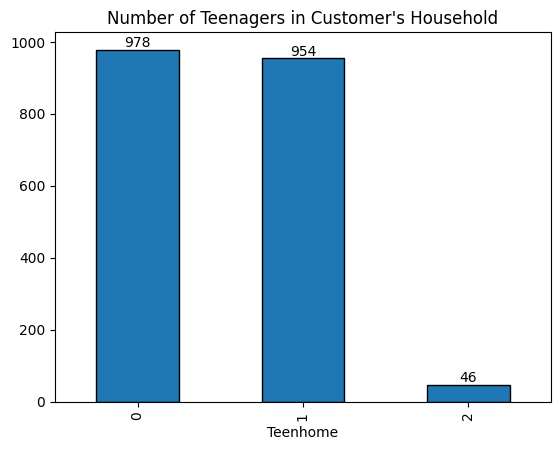

In [ ]:
# Plotting the Number of Teenagers in Customer's Household
ax=df_no_outliers['Teenhome'].value_counts().plot(kind="bar",title="Number of Teenagers in Customer's Household", edgecolor="black")
for i in ax.containers:
  ax.bar_label(i)
  ax.set_xlabel('Teenhome')
  plt.show()

Text(0, 0.5, "Frequency of Customer's")

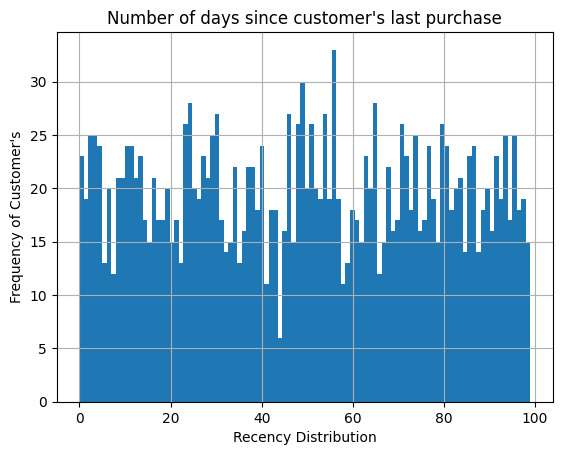

In [ ]:
df_no_outliers['Recency'].hist(bins=100)
plt.title("Number of days since customer's last purchase");
plt.xlabel("Recency Distribution")
plt.ylabel("Frequency of Customer's")

In [ ]:
max_recency_count = df_no_outliers['Recency'].value_counts().max()
print('Maximum Recency Count',max_recency_count)
min_recency_count = df_no_outliers['Recency'].value_counts().min()
print('Minimum Recency Count',min_recency_count)
mean_recency_count = df_no_outliers['Recency'].value_counts().mean()
print('Mean Recency Count',mean_recency_count)


Maximum Recency Count 33
Minimum Recency Count 6
Mean Recency Count 19.78


In [ ]:
df_no_outliers['Complain'].value_counts()

0    1958
1      20
Name: Complain, dtype: int64

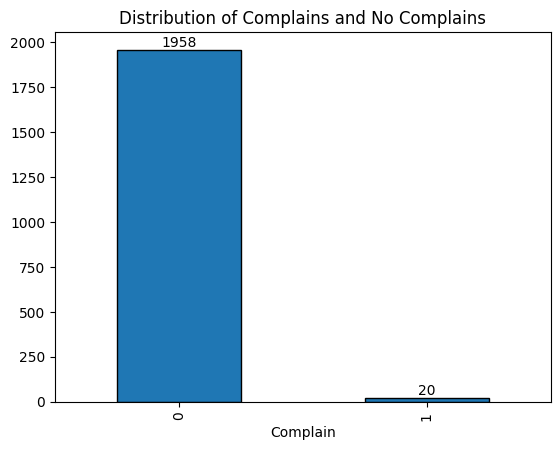

In [ ]:
# Plotting the Complains and No Complains
ax=df_no_outliers['Complain'].value_counts().plot(kind="bar",title='Distribution of Complains and No Complains', edgecolor="black")
for i in ax.containers:
  ax.bar_label(i)
  ax.set_xlabel('Complain')
  plt.show()

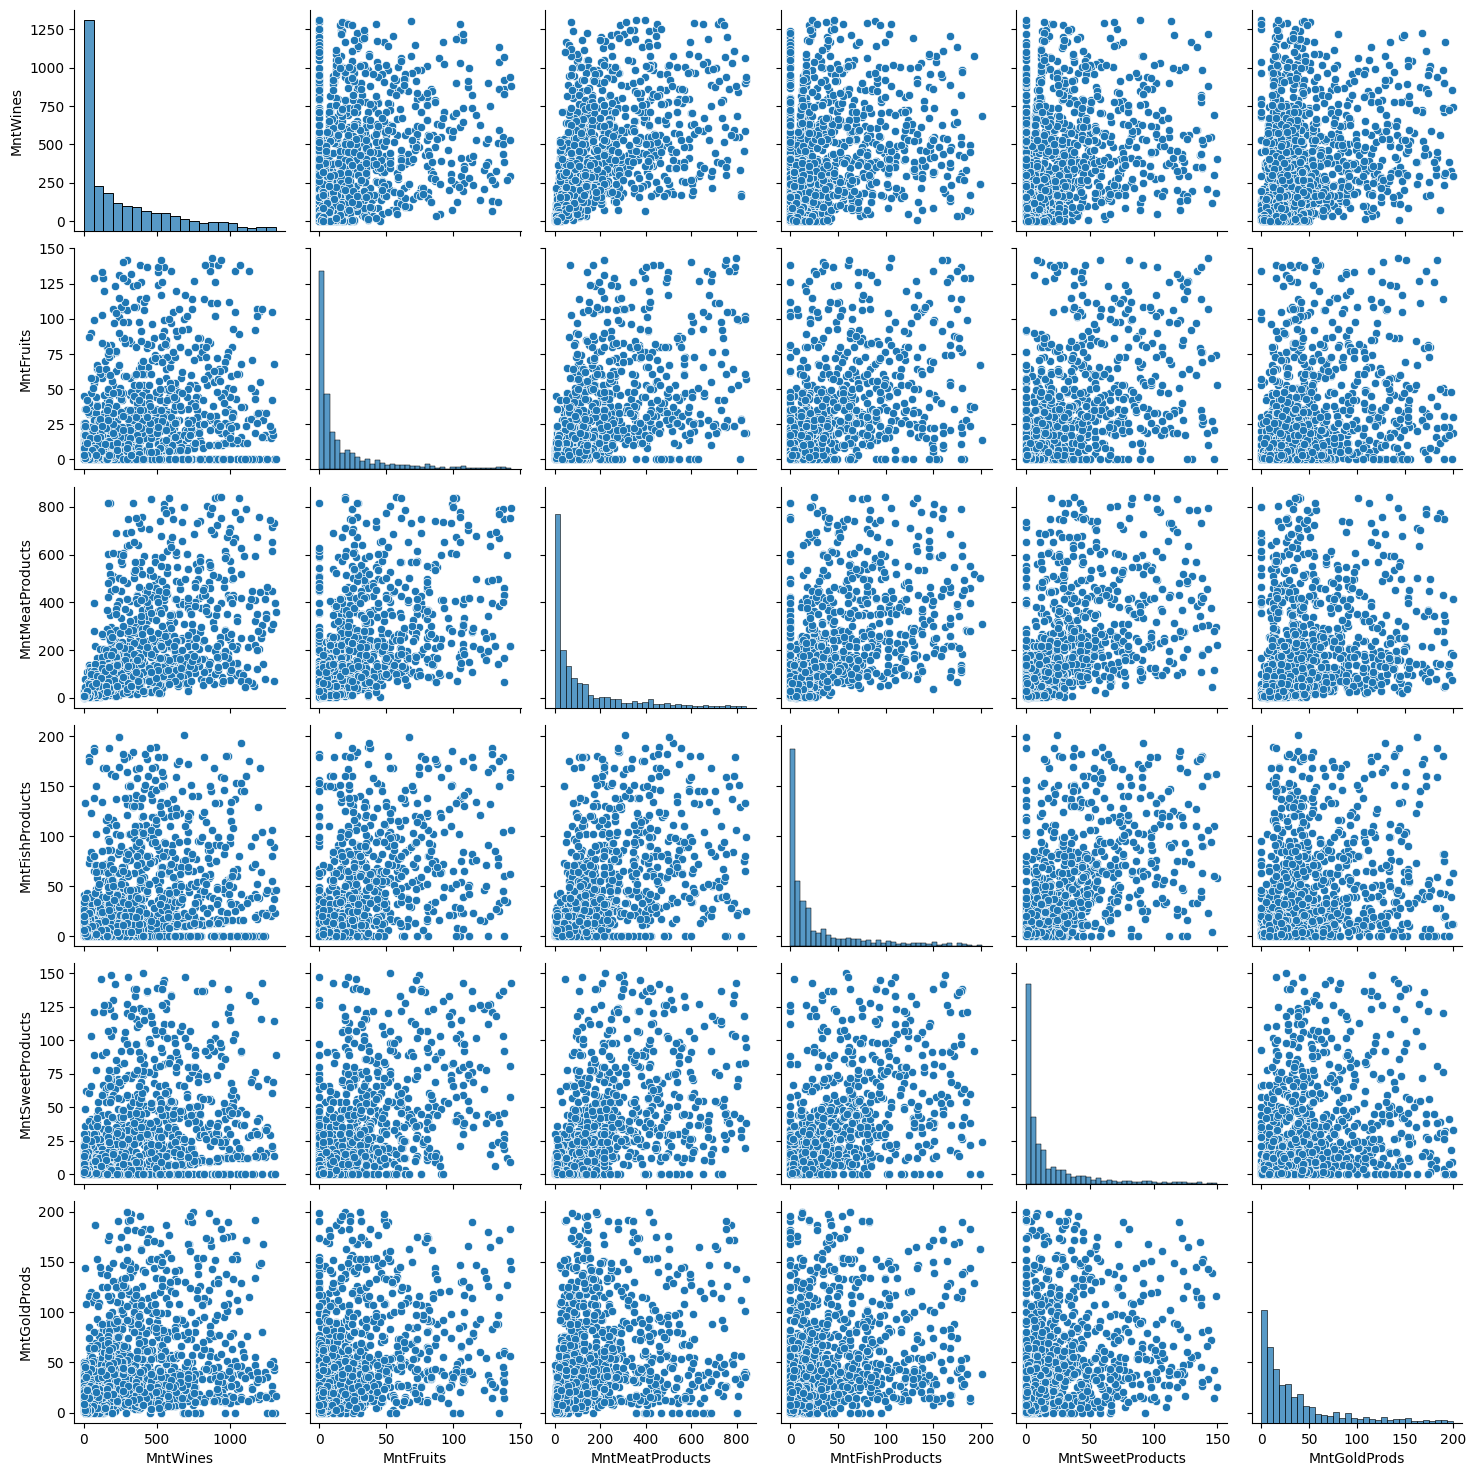

In [ ]:
sns.pairplot(df_no_outliers[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']])
plt.show()

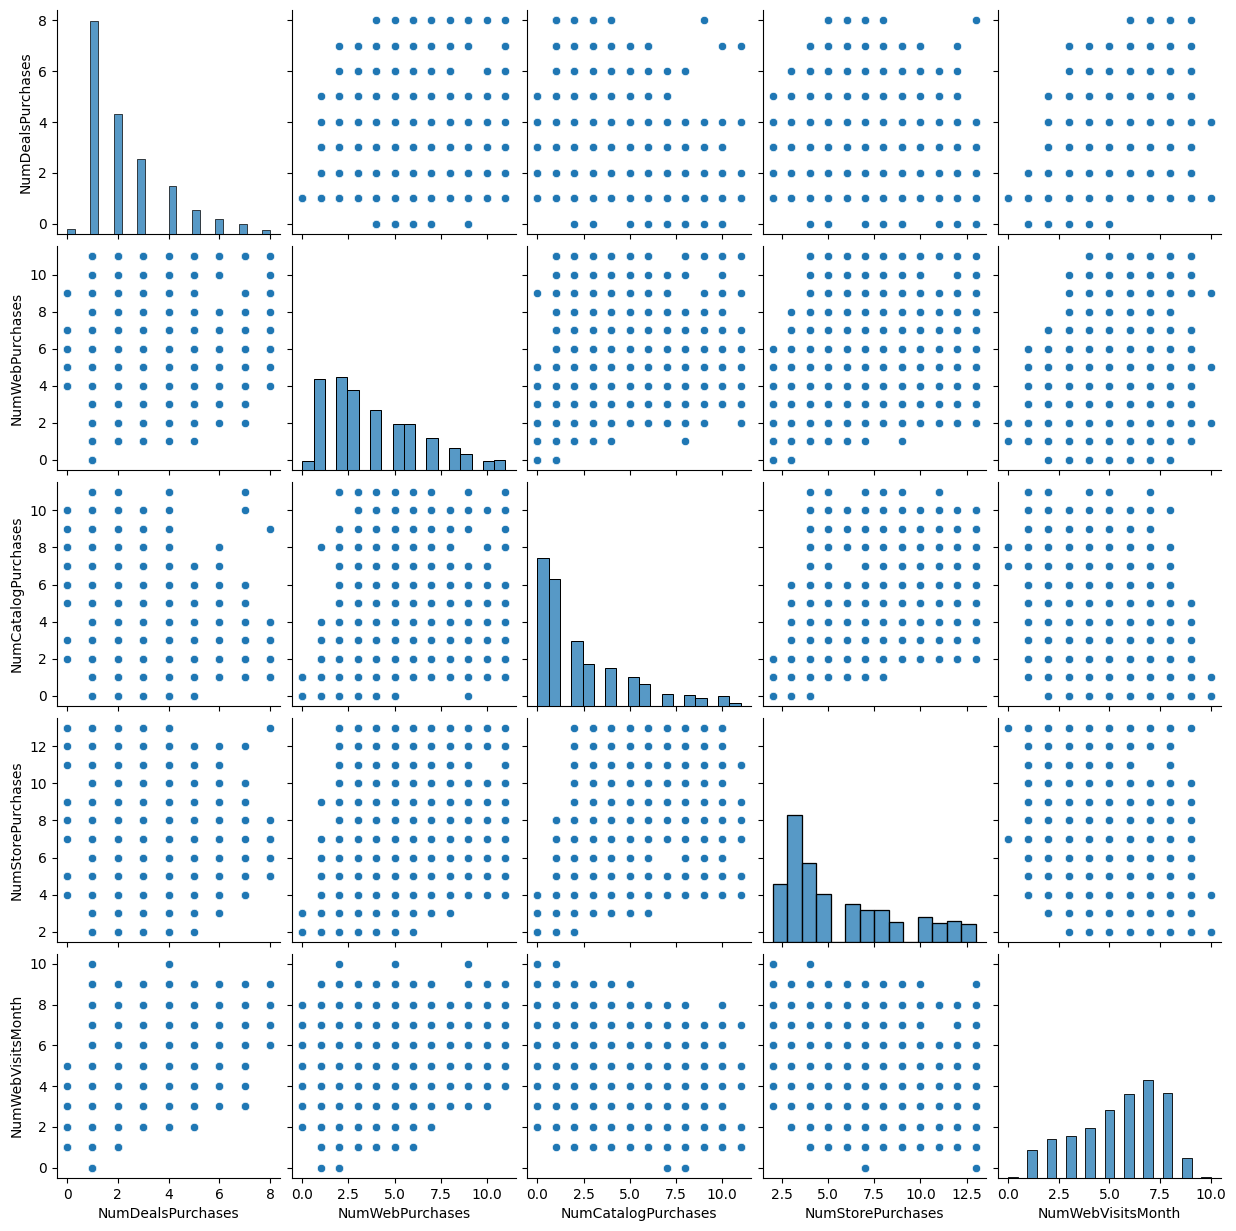

In [ ]:
sns.pairplot(df_no_outliers[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']])
plt.show()

In [ ]:
amount_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']
df_no_outliers['Total_Amount'] =  df_no_outliers[amount_columns].sum(axis=1)
df_no_outliers.head()

<ipython-input-56-3f7257a8412a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Total_Amount'] =  df_no_outliers[amount_columns].sum(axis=1)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Total_Amount
0,2,4,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,0,67,1617
1,2,4,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,70,27
2,2,5,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,59,776
3,2,5,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,40,53
4,4,3,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,43,422


In [ ]:
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
df_no_outliers['Total_Purchases'] =  df_no_outliers[purchase_columns].sum(axis=1)
df_no_outliers.head()

<ipython-input-57-f3de4ec1c294>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Total_Purchases'] =  df_no_outliers[purchase_columns].sum(axis=1)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Total_Amount,Total_Purchases
0,2,4,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,67,1617,32
1,2,4,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,70,27,11
2,2,5,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,59,776,25
3,2,5,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,40,53,14
4,4,3,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,43,422,24


In [ ]:
accepted_complain_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']
df_no_outliers['Total_Accepted_Complains'] =  df_no_outliers[accepted_complain_columns].sum(axis=1) / len(accepted_complain_columns)
df_no_outliers.head()

<ipython-input-58-5878b6f609be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Total_Accepted_Complains'] =  df_no_outliers[accepted_complain_columns].sum(axis=1) / len(accepted_complain_columns)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Total_Amount,Total_Purchases,Total_Accepted_Complains
0,2,4,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,67,1617,32,0.0
1,2,4,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,70,27,11,0.0
2,2,5,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,59,776,25,0.0
3,2,5,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,40,53,14,0.0
4,4,3,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,43,422,24,0.0


In [ ]:
drop_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds',
                'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2' ]
df_no_outliers.drop(columns=drop_columns, inplace=True)
df_no_outliers

<ipython-input-59-55d8106d94ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop(columns=drop_columns, inplace=True)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Complain,Age,Total_Amount,Total_Purchases,Total_Accepted_Complains
0,2,4,58138.0,0,0,58,0,67,1617,32,0.0
1,2,4,46344.0,1,1,38,0,70,27,11,0.0
2,2,5,71613.0,0,0,26,0,59,776,25,0.0
3,2,5,26646.0,1,0,26,0,40,53,14,0.0
4,4,3,58293.0,1,0,94,0,43,422,24,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2234,2,3,34421.0,1,0,81,0,50,30,11,0.0
2236,4,5,64014.0,2,1,56,0,78,444,29,0.2
2237,2,2,56981.0,0,0,91,0,43,1241,25,0.2
2238,3,5,69245.0,0,1,8,0,68,843,26,0.0


In [ ]:
df_no_outliers.shape

(1978, 11)

In [ ]:
df_no_outliers.size

21758

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_no_outliers)
scaled_df

array([[-0.37048003,  0.25480557,  0.45512136, ...,  2.05142553,
         1.75848793, -0.41714307],
       [-0.37048003,  0.25480557, -0.14974682, ..., -0.89667535,
        -1.2134411 , -0.41714307],
       [-0.37048003,  1.18642374,  1.14620147, ...,  0.49208412,
         0.76784492, -0.41714307],
       ...,
       [-0.37048003, -1.60843075,  0.39578335, ...,  1.35426457,
         0.76784492,  1.22323267],
       [ 0.51669854,  1.18642374,  1.024756  , ...,  0.61631227,
         0.90936535, -0.41714307],
       [ 1.40387712, -0.67681259,  0.18489494, ..., -0.62782338,
        -0.22279809, -0.41714307]])

# Model Building

### K-means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
  kmeans.fit(scaled_df)
  wcss.append(kmeans.inertia_)

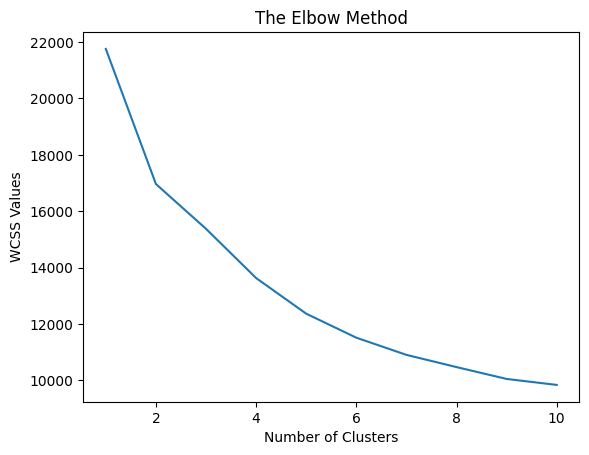

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Values')
plt.show()

In [ ]:
# final model with k=4
kmeans_model = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=0)
kmeans_model.fit(scaled_df)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [ ]:
kmeans_model.labels_

array([1, 2, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
kmeans_model.predict(scaled_df)

array([1, 2, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
df_no_outliers['cluster_labels'] = kmeans_model.predict(scaled_df)
df_no_outliers

<ipython-input-69-52a970c2aba8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['cluster_labels'] = kmeans_model.predict(scaled_df)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Complain,Age,Total_Amount,Total_Purchases,Total_Accepted_Complains,cluster_labels
0,2,4,58138.0,0,0,58,0,67,1617,32,0.0,1
1,2,4,46344.0,1,1,38,0,70,27,11,0.0,2
2,2,5,71613.0,0,0,26,0,59,776,25,0.0,1
3,2,5,26646.0,1,0,26,0,40,53,14,0.0,2
4,4,3,58293.0,1,0,94,0,43,422,24,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2234,2,3,34421.0,1,0,81,0,50,30,11,0.0,2
2236,4,5,64014.0,2,1,56,0,78,444,29,0.2,1
2237,2,2,56981.0,0,0,91,0,43,1241,25,0.2,0
2238,3,5,69245.0,0,1,8,0,68,843,26,0.0,1


In [ ]:
# saving clustering model

import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [ ]:
df_no_outliers.to_csv("Clustered_Customer_Data.csv")

In [ ]:
df_no_outliers['cluster_labels'].value_counts()

2    962
1    813
0    183
3     20
Name: cluster_labels, dtype: int64

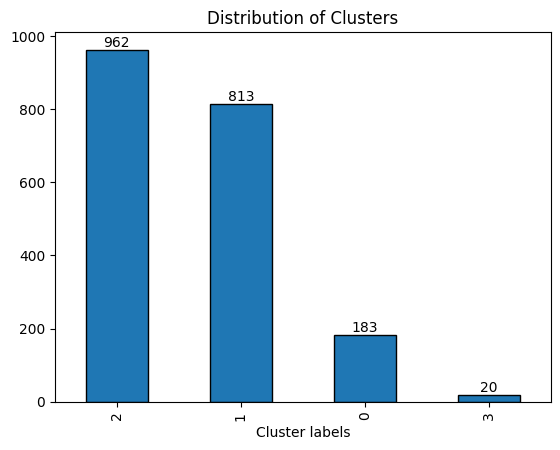

In [ ]:
# Plotting the Number of Teenagers in Customer's Household
ax=df_no_outliers['cluster_labels'].value_counts().plot(kind="bar",title="Distribution of Clusters", edgecolor="black")
for i in ax.containers:
  ax.bar_label(i)
  ax.set_xlabel('Cluster labels')
  plt.show()

In [ ]:
kmeans_model.cluster_centers_

array([[ 1.28860915e-01, -4.82571691e-03,  1.39659461e+00,
        -7.54384096e-01, -5.50436987e-01,  7.92768470e-03,
        -1.01066832e-01,  7.94580943e-02,  1.70994756e+00,
         7.31498144e-01,  2.40645451e+00],
       [ 2.14424908e-01,  1.07284911e-02,  6.18357774e-01,
        -6.65837409e-01,  4.07327069e-01, -9.11069554e-05,
        -1.01066832e-01,  3.78702245e-01,  5.12799076e-01,
         6.65838806e-01, -2.11339474e-01],
       [-1.96179875e-01, -8.60413486e-03, -7.84426063e-01,
         6.99819214e-01, -2.40338941e-01, -2.47104639e-03,
        -1.01066832e-01, -3.36245633e-01, -7.54083006e-01,
        -7.01496092e-01, -2.75613772e-01],
       [-4.59197890e-01,  2.19010336e-02, -1.84190564e-01,
         3.07600992e-01,  3.89561360e-02,  5.00225142e-02,
         9.89444288e+00,  5.21270891e-02, -2.19910054e-01,
        -1.75934650e-02, -1.71086711e-01]])

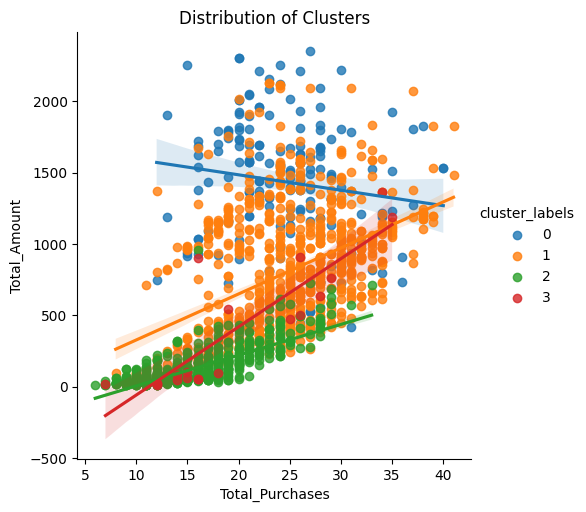

In [ ]:
sns.lmplot(data=df_no_outliers,x = 'Total_Purchases', y =	'Total_Amount', hue='cluster_labels')
plt.title('Distribution of Clusters')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette = silhouette_score(scaled_df, kmeans_model.labels_)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.20671057579421773


### Hierarchial Clustering

In [ ]:
features = pd.DataFrame(data=scaled_df)
features

,0,1,2,3,4,5,6,7,8,9,10
0,-0.370480,0.254806,0.455121,-0.884689,-0.972509,0.300187,-0.101067,1.030040,2.051426,1.758488,-0.417143
1,-0.370480,0.254806,-0.149747,0.949603,0.866518,-0.389923,-0.101067,1.288520,-0.896675,-1.213441,-0.417143
2,-0.370480,1.186424,1.146201,-0.884689,-0.972509,-0.803989,-0.101067,0.340762,0.492084,0.767845,-0.417143
3,-0.370480,1.186424,-1.159980,0.949603,-0.972509,-0.803989,-0.101067,-1.296273,-0.848467,-0.788880,-0.417143
4,1.403877,-0.676813,0.463071,0.949603,-0.972509,1.542386,-0.101067,-1.037794,-0.164286,0.626324,-0.417143
...,...,...,...,...,...,...,...,...,...,...,...
1973,-0.370480,-0.676813,-0.761231,0.949603,-0.972509,1.093814,-0.101067,-0.434676,-0.891113,-1.213441,-0.417143
1974,1.403877,1.186424,0.756478,2.783896,0.866518,0.231176,-0.101067,1.977798,-0.123494,1.333927,1.223233
1975,-0.370480,-1.608431,0.395783,-0.884689,-0.972509,1.438869,-0.101067,-1.037794,1.354265,0.767845,1.223233
1976,0.516699,1.186424,1.024756,-0.884689,0.866518,-1.425088,-0.101067,1.116200,0.616312,0.909365,-0.417143


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

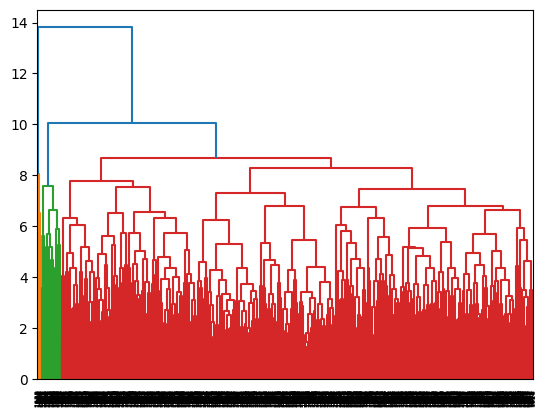

<Figure size 3000x2000 with 0 Axes>

In [ ]:
dendrogram_df=sch.dendrogram(sch.linkage(features,method='complete'))
plt.figure(figsize=(30,20))
plt.show()

In [ ]:
agg=AgglomerativeClustering(n_clusters=4,linkage='complete')
agg

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [ ]:
clustersH=agg.fit(features)

In [ ]:
clustersH.labels_

array([3, 0, 3, ..., 2, 0, 0])

In [ ]:
np.unique(clustersH.labels_)

array([0, 1, 2, 3])

In [ ]:
features['clustersH_labels']=clustersH.labels_
features

,0,1,2,3,4,5,6,7,8,9,10,clustersH_labels
0,-0.370480,0.254806,0.455121,-0.884689,-0.972509,0.300187,-0.101067,1.030040,2.051426,1.758488,-0.417143,3
1,-0.370480,0.254806,-0.149747,0.949603,0.866518,-0.389923,-0.101067,1.288520,-0.896675,-1.213441,-0.417143,0
2,-0.370480,1.186424,1.146201,-0.884689,-0.972509,-0.803989,-0.101067,0.340762,0.492084,0.767845,-0.417143,3
3,-0.370480,1.186424,-1.159980,0.949603,-0.972509,-0.803989,-0.101067,-1.296273,-0.848467,-0.788880,-0.417143,0
4,1.403877,-0.676813,0.463071,0.949603,-0.972509,1.542386,-0.101067,-1.037794,-0.164286,0.626324,-0.417143,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1973,-0.370480,-0.676813,-0.761231,0.949603,-0.972509,1.093814,-0.101067,-0.434676,-0.891113,-1.213441,-0.417143,0
1974,1.403877,1.186424,0.756478,2.783896,0.866518,0.231176,-0.101067,1.977798,-0.123494,1.333927,1.223233,0
1975,-0.370480,-1.608431,0.395783,-0.884689,-0.972509,1.438869,-0.101067,-1.037794,1.354265,0.767845,1.223233,2
1976,0.516699,1.186424,1.024756,-0.884689,0.866518,-1.425088,-0.101067,1.116200,0.616312,0.909365,-0.417143,0


In [ ]:
features['clustersH_labels'].value_counts()

0    1340
3     542
2      76
1      20
Name: clustersH_labels, dtype: int64

In [ ]:
silhouette_score(features,clustersH.labels_)

0.2926119229862864

# Classification Model

In [ ]:
y = df_no_outliers[['cluster_labels']]
y

,cluster_labels
0,1
1,2
2,1
3,2
4,2
...,...
2234,2
2236,1
2237,0
2238,1


In [ ]:
y = np.ravel(y)
y

array([1, 2, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
X = df_no_outliers.drop('cluster_labels',axis=1)
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Complain,Age,Total_Amount,Total_Purchases,Total_Accepted_Complains
0,2,4,58138.0,0,0,58,0,67,1617,32,0.0
1,2,4,46344.0,1,1,38,0,70,27,11,0.0
2,2,5,71613.0,0,0,26,0,59,776,25,0.0
3,2,5,26646.0,1,0,26,0,40,53,14,0.0
4,4,3,58293.0,1,0,94,0,43,422,24,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2234,2,3,34421.0,1,0,81,0,50,30,11,0.0
2236,4,5,64014.0,2,1,56,0,78,444,29,0.2
2237,2,2,56981.0,0,0,91,0,43,1241,25,0.2
2238,3,5,69245.0,0,1,8,0,68,843,26,0.0


In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(X,y,train_size=0.75,random_state=100)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1483, 11)
(495, 11)
(1483,)
(495,)


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [ ]:
dec_tree = DecisionTreeClassifier()

In [ ]:
# Grid Search
params= {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,45,6,7,8,9,10]}
grid_search= GridSearchCV(dec_tree,params)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 45, 'splitter': 'random'}

In [ ]:
dec_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=45)

In [ ]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=45)

In [ ]:
y_pred_dt = dec_tree.predict(x_test)
y_pred_dt

array([2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0,
       1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1,
       1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 3, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 3, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1,
       1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 3, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 0, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1,
       1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 1, 2,

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
accuracy_dt = accuracy_score(y_test,y_pred_dt)

In [ ]:
print('Accuray Score for Decision Tree: ',accuracy_dt )

Accuray Score for Decision Tree:  0.9575757575757575


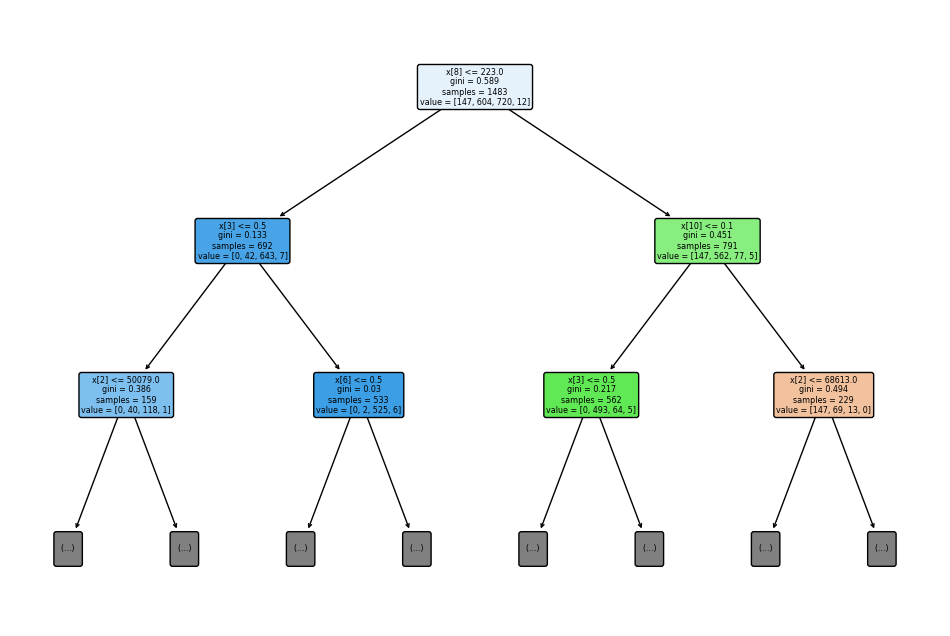

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(dec_tree,filled=True,rounded=True,feature_names=df_no_outliers.get(X),max_depth=2);

In [ ]:
confusion_matrix(y_test,y_pred_dt)

array([[ 32,   4,   0,   0],
       [  0, 201,   8,   0],
       [  0,   7, 235,   0],
       [  1,   1,   0,   6]])

In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.94      0.96      0.95       209
           2       0.97      0.97      0.97       242
           3       1.00      0.75      0.86         8

    accuracy                           0.96       495
   macro avg       0.97      0.89      0.93       495
weighted avg       0.96      0.96      0.96       495



### Support Vector Machine



In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
# 'kernel':['rbf','linear','poly','sigmoid']

In [ ]:
svc = SVC(C=4.0,kernel='linear',gamma=0.2)

In [ ]:
svc.fit(x_train,y_train)

SVC(C=4.0, gamma=0.2, kernel='linear')

In [ ]:
y_pred_svc = svc.predict(x_test)
y_pred_svc

array([2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2,
       1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2,

In [ ]:
accuracy_svc = accuracy_score(y_test,y_pred_svc)

In [ ]:
print('Accuray Score for Support Vector Classifier: ',accuracy_svc )

Accuray Score for Support Vector Classifier:  0.8747474747474747


In [ ]:
confusion_matrix(y_test,y_pred_svc)

array([[ 18,  18,   0,   0],
       [  8, 190,  11,   0],
       [  0,  17, 225,   0],
       [  1,   3,   4,   0]])

In [ ]:
print(classification_report(y_test,y_pred_svc,zero_division=1))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        36
           1       0.83      0.91      0.87       209
           2       0.94      0.93      0.93       242
           3       1.00      0.00      0.00         8

    accuracy                           0.87       495
   macro avg       0.86      0.58      0.59       495
weighted avg       0.87      0.87      0.87       495



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand_forest = RandomForestClassifier()

In [ ]:
rand_forest = RandomForestClassifier(n_estimators=200,max_depth=7,min_samples_split=5)

In [ ]:
rand_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=5, n_estimators=200)

In [ ]:
y_pred_rf = rand_forest.predict(x_test)

In [ ]:
accuracy_rf = accuracy_score(y_test,y_pred_rf)

In [ ]:
print('Accuray Score for Random Forest: ',accuracy_rf)

Accuray Score for Random Forest:  0.9676767676767677


In [ ]:
confusion_matrix(y_test,y_pred_rf)

array([[ 33,   3,   0,   0],
       [  0, 206,   3,   0],
       [  0,   8, 234,   0],
       [  1,   0,   1,   6]])

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.95      0.99      0.97       209
           2       0.98      0.97      0.97       242
           3       1.00      0.75      0.86         8

    accuracy                           0.97       495
   macro avg       0.98      0.90      0.94       495
weighted avg       0.97      0.97      0.97       495



In [ ]:
# saving classification model

import pickle
filename = 'final_model.pkl'
pickle.dump(rand_forest, open(filename, 'wb'))

# load the model

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test,y_test)
print(result, '% Accuracy')

0.9676767676767677 % Accuracy


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
best_params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'weights':['uniform','distance'],'p':[1,2,3]}
grid_search = GridSearchCV(knn,best_params,cv=None,scoring='accuracy')
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4,p=1,weights='distance')

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

In [ ]:
y_pred_knn =knn.predict(x_test)
y_pred_knn

array([2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 3, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2,
       1, 1, 2, 1, 3, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 0, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2,
       1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 2,

In [ ]:
accuracy_knn = accuracy_score(y_test,y_pred_knn)

In [ ]:
print('Accuray Score for KNN: ',accuracy_knn)

Accuray Score for KNN:  0.8383838383838383


In [ ]:
confusion_matrix(y_test,y_pred_knn)


array([[ 21,  15,   0,   0],
       [ 14, 171,  24,   0],
       [  0,  18, 222,   2],
       [  1,   3,   3,   1]])

In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        36
           1       0.83      0.82      0.82       209
           2       0.89      0.92      0.90       242
           3       0.33      0.12      0.18         8

    accuracy                           0.84       495
   macro avg       0.66      0.61      0.62       495
weighted avg       0.83      0.84      0.83       495

